In [2]:
from distributions import gaussian_bump
import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dim = 16
mean_bg3b = 0.48 * torch.ones(dim)
cov_bg3b = 0.15 * torch.eye(dim)
bg3b = gaussian_bump(mean_bg3b, cov_bg3b)

mean_bg4b = 0.52 * torch.ones(dim)
cov_bg4b = 0.15 * torch.eye(dim)
bg4b = gaussian_bump(mean_bg4b, cov_bg4b)

mean_hh4b = 0.55 * torch.ones(dim)
cov_hh4b = 0.05 * torch.eye(dim)
hh4b = gaussian_bump(mean_hh4b, cov_hh4b)

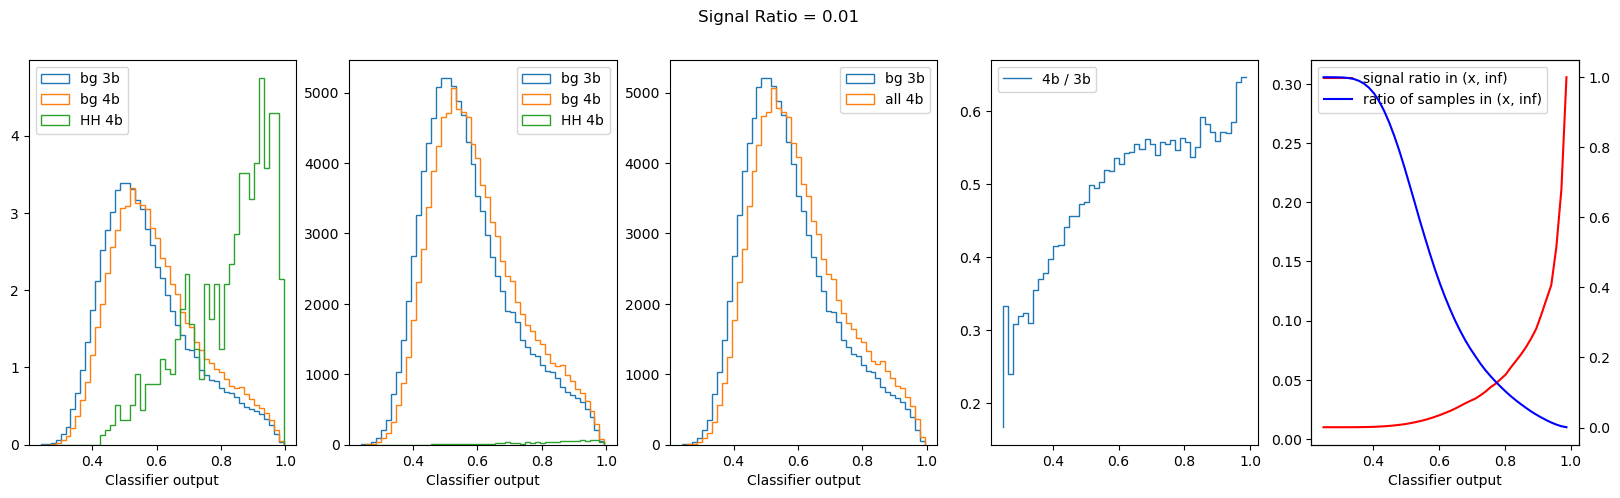

Signal Ratio = 0.01
Means: [[0.4996635  0.50116336 0.70161637 0.50365958 0.50140826 0.4996331
  0.50090227 0.5033916  0.50395554 0.5022213  0.49934311 0.50272814
  0.50290652 0.49876138 0.50152409 0.50315399]
 [0.49972144 0.49969989 0.29636876 0.49640086 0.49958162 0.4999614
  0.49687247 0.49687807 0.49928321 0.49933373 0.50185601 0.50040612
  0.49788469 0.50142403 0.49819771 0.49746629]]
Weights: [0.50166618 0.49833382]



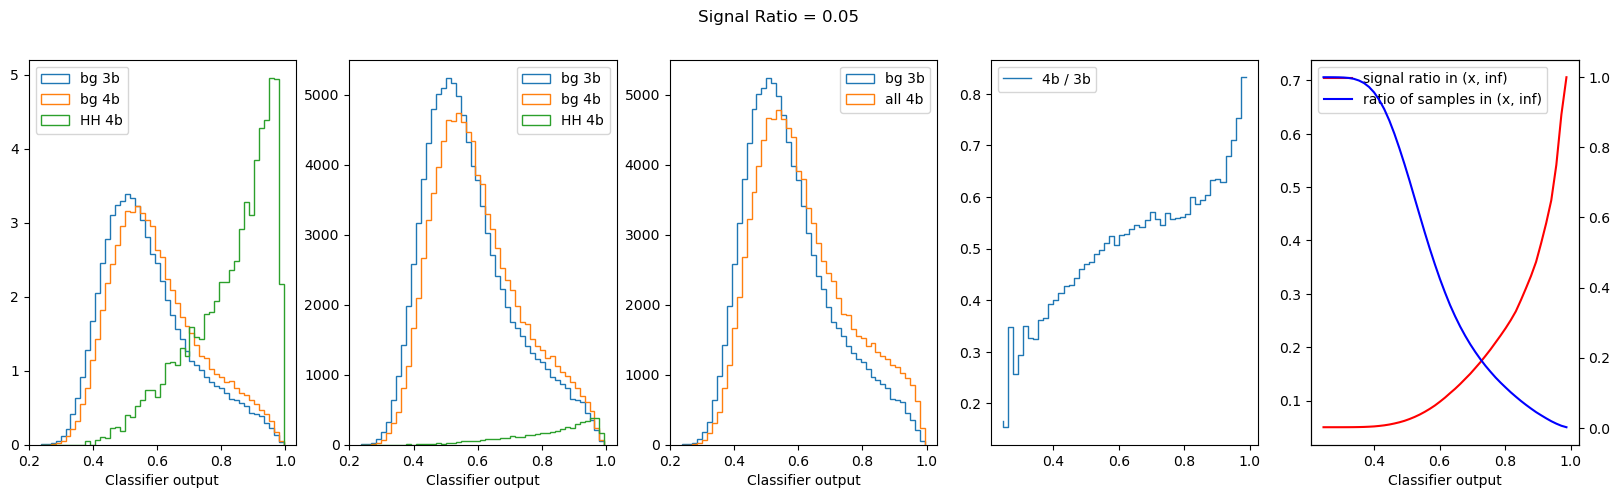

Signal Ratio = 0.05
Means: [[0.50129574 0.5033634  0.50284271 0.50169267 0.50339507 0.50174138
  0.50372011 0.4997276  0.5022185  0.502482   0.50208025 0.70486754
  0.50265401 0.50250831 0.50140705 0.50102616]
 [0.49875068 0.49858758 0.49610424 0.49768759 0.49858769 0.5002956
  0.49876195 0.50263417 0.49989317 0.50283484 0.4986115  0.3003026
  0.49964099 0.50017701 0.49895223 0.49986682]]
Weights: [0.49737616 0.50262384]



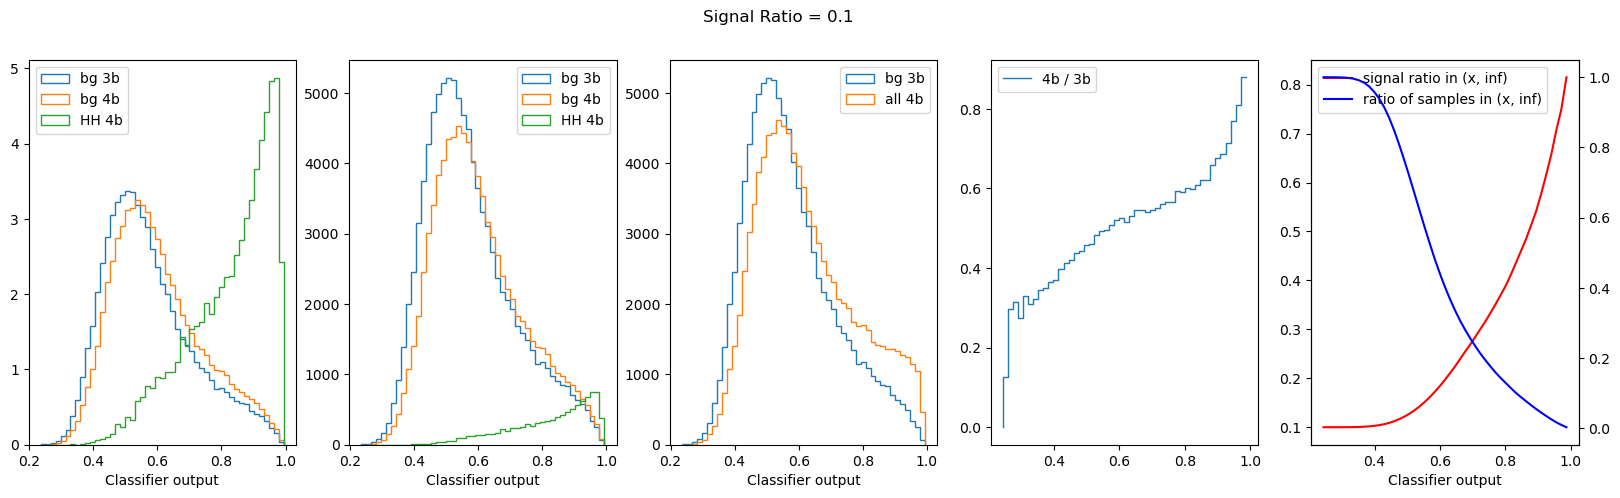

Signal Ratio = 0.1
Means: [[0.50150798 0.70024016 0.503051   0.49935258 0.50307956 0.50399254
  0.50417362 0.50170312 0.50277879 0.50232385 0.50475581 0.50302362
  0.50390678 0.50505557 0.50464652 0.50470042]
 [0.50221606 0.29910653 0.49997605 0.50332419 0.50055345 0.49978398
  0.50143207 0.50250288 0.50180711 0.50199394 0.49922086 0.49948932
  0.49837167 0.49832736 0.4980787  0.50007852]]
Weights: [0.50755791 0.49244209]



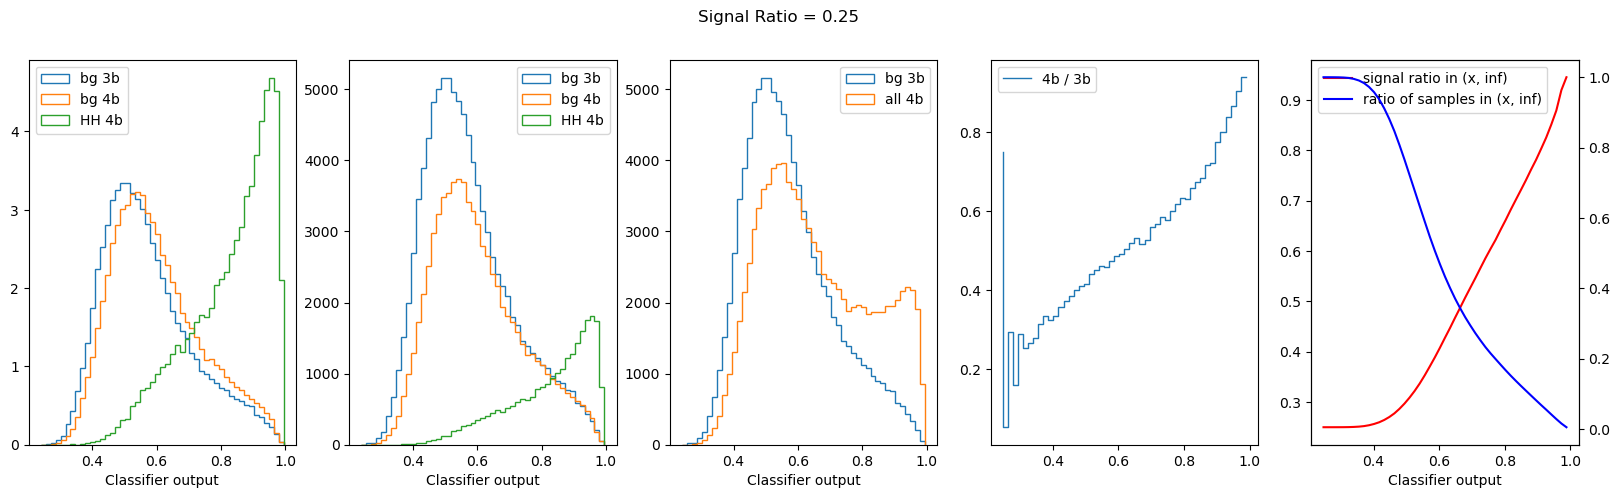

Signal Ratio = 0.25
Means: [[0.54749889 0.54115121 0.53591455 0.54657875 0.5392171  0.52636332
  0.53562338 0.54227584 0.56109379 0.53287334 0.52973241 0.53507845
  0.59028746 0.54628995 0.54714413 0.5313116 ]
 [0.45958861 0.46419326 0.47162679 0.46032462 0.46898532 0.48116572
  0.47025737 0.46515681 0.44560779 0.47516478 0.47839486 0.4721788
  0.41668105 0.46049248 0.45945698 0.47635948]]
Weights: [0.50796418 0.49203582]



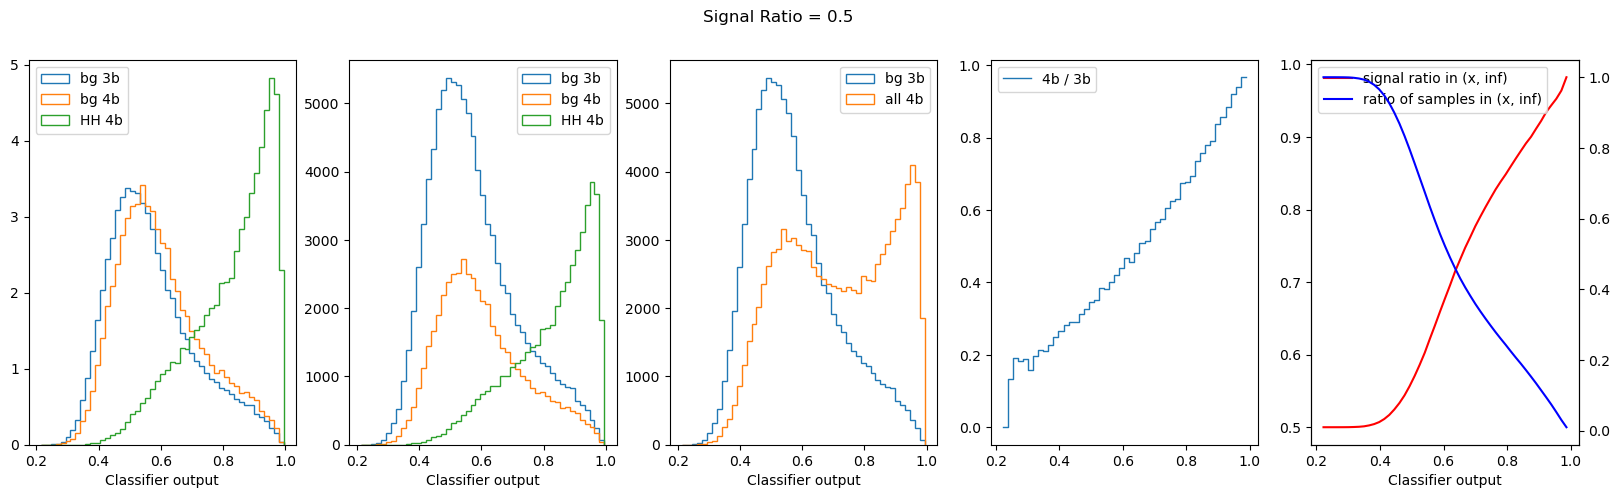

Signal Ratio = 0.5
Means: [[0.49574425 0.49226752 0.49769841 0.49536099 0.49754856 0.49688748
  0.49784816 0.49588418 0.49518619 0.49422657 0.31552442 0.49821199
  0.4954856  0.49515917 0.49651897 0.49690678]
 [0.51879564 0.52220355 0.51817706 0.51883187 0.51735125 0.51818789
  0.51694856 0.51970397 0.519784   0.51902944 0.67635221 0.51872505
  0.52025232 0.51875547 0.51957976 0.51858257]]
Weights: [0.46764708 0.53235292]



In [4]:
torch.manual_seed(42)

n_bg3b = 100000
n_all4b = 100000
# signal_ratio = 0.5

for signal_ratio in [0.01, 0.05, 0.1, 0.25, 0.5]:
    n_bg4b = int(n_all4b * (1 - signal_ratio))
    n_hh4b = n_all4b - n_bg4b

    # sample from each distribution

    X_bg3b = bg3b.sample(n_bg3b)
    X_bg4b = bg4b.sample(n_bg4b)
    X_hh4b = hh4b.sample(n_hh4b)

    def theo_probs_4b(x: torch.Tensor):
        p4b = bg4b.pdf(x) + hh4b.pdf(x) 
        p3b = bg3b.pdf(x)

        return p4b / (p3b + p4b)
    
    def theo_probs_signal(x: torch.Tensor):
        p_signal = hh4b.pdf(x)
        p_bg = bg3b.pdf(x) + bg4b.pdf(x)

        return p_signal / (p_bg + p_signal)


    probs_4b_bg3b = theo_probs_4b(X_bg3b).detach().numpy()
    probs_4b_bg4b = theo_probs_4b(X_bg4b).detach().numpy()
    probs_4b_hh4b = theo_probs_4b(X_hh4b).detach().numpy()

    probs_4b = np.concatenate([probs_4b_bg3b, probs_4b_bg4b, probs_4b_hh4b])
    bins_range = np.linspace(min(probs_4b), max(probs_4b), 50)

    fig, ax = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle(f"Signal Ratio = {signal_ratio}")

    hist_bg3b, _, _ = ax[0].hist(probs_4b_bg3b, bins=bins_range, label="bg 3b", linewidth=1, histtype="step", density=True)
    hist_bg4b, _, _ = ax[0].hist(probs_4b_bg4b, bins=bins_range, label="bg 4b", linewidth=1, histtype="step", density=True)
    hist_hh4b, _, _ = ax[0].hist(probs_4b_hh4b, bins=bins_range, label="HH 4b", linewidth=1, histtype="step", density=True)
    ax[0].legend()
    ax[0].set_xlabel("Classifier output")

    hist_bg3b, _, _ = ax[1].hist(probs_4b_bg3b, bins=bins_range, label="bg 3b", linewidth=1, histtype="step", density=False)
    hist_bg4b, _, _ = ax[1].hist(probs_4b_bg4b, bins=bins_range, label="bg 4b", linewidth=1, histtype="step", density=False)
    hist_hh4b, _, _ = ax[1].hist(probs_4b_hh4b, bins=bins_range, label="HH 4b", linewidth=1, histtype="step", density=False)
    ax[1].legend()
    ax[1].set_xlabel("Classifier output")

    ax[2].hist(probs_4b_bg3b, bins=bins_range, label="bg 3b", linewidth=1, histtype="step", density=False)
    ax[2].hist(np.concatenate([probs_4b_bg4b, probs_4b_hh4b]), bins=bins_range, label="all 4b", linewidth=1, histtype="step", density=False)
    ax[2].legend()
    ax[2].set_xlabel("Classifier output")

    ax[3].step((bins_range[:-1] + bins_range[1:]) / 2, (hist_bg4b + hist_hh4b) / (hist_bg4b + hist_hh4b + hist_bg3b), label="4b / 3b", linewidth=1)
    ax[3].legend()
    
    ln1 = ax[4].plot((bins_range[:-1] + bins_range[1:]) / 2, (np.cumsum(hist_hh4b[::-1]) / (np.cumsum(hist_hh4b[::-1]) + np.cumsum(hist_bg4b[::-1])))[::-1], 
                     label="signal ratio in (x, inf)", c="r")
    ax[4].set_xlabel("Classifier output")
    ax2 = ax[4].twinx()
    ln2 = ax2.plot((bins_range[:-1] + bins_range[1:]) / 2, np.cumsum(hist_bg3b[::-1] + hist_bg4b[::-1] + hist_hh4b[::-1])[::-1] / (n_bg3b + n_all4b), 
                   label="ratio of samples in (x, inf)", c="b")
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax[4].legend(lns, labs)


    plt.show()
    plt.close()

    X = torch.cat([X_bg3b, X_bg4b, X_hh4b], dim=0)
    X = X[torch.randperm(X.shape[0])]

    # fit GMM

    from sklearn.mixture import GaussianMixture

    gmm = GaussianMixture(n_components=2, covariance_type="full")
    gmm.fit(X)

    # print GMM

    print(f"Signal Ratio = {signal_ratio}")
    print(f"Means: {gmm.means_}")
    print(f"Weights: {gmm.weights_}")
    print()



    
